In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
%matplotlib inline

In [4]:
df = pd.read_csv('./content.csv',encoding='utf-8')

Index(['Cleaned_txt', 'Labels'], dtype='object')

In [66]:
for label, group in df.groupby('Labels'):
    print(f'Label: {label}')
    print(group.head(10))
    print('\n')

Label: Cooking
                                          Cleaned_txt   Labels
10  Cooking is the art of preparing food by combin...  Cooking
11  It is a fundamental life skill that is essenti...  Cooking
12  The process of cooking involves a range of tec...  Cooking
13  A good cook is able to balance flavors and tex...  Cooking
14  Cooking can be a creative outlet allowing indi...  Cooking
15  Preparing meals at home can also be more cost-...  Cooking
16  Cooking can also be a way to bring people toge...  Cooking
17  The practice of cooking has been around for th...  Cooking
18  Advancements in technology and modern kitchen ...  Cooking
19  Overall cooking is a valuable skill that can l...  Cooking


Label: Dog
                                          Cleaned_txt Labels
20  Dogs are one of the most beloved and popular p...    Dog
21  There are hundreds of different dog breeds eac...    Dog
22  Dogs are known for their loyalty and devotion ...    Dog
23  Many dogs are highly intelligen

In [67]:
nltk.download('stopwords')
nltk.download('wordnet')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
max_features_1 = 100
max_features_2 = 50

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karandhir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/karandhir/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [68]:
vec_1 = CountVectorizer(stop_words='english')
vec_2 = TfidfVectorizer(stop_words='english')
vec_3 = CountVectorizer(stop_words='english', max_features=max_features_1)
vec_4 = TfidfVectorizer(stop_words='english', max_features=max_features_2)

In [69]:

def lemmatize_words(text):
        lemmatizer = WordNetLemmatizer()
        words = text.split()
        words = [lemmatizer.lemmatize(word) for word in words]
        return ' '.join(words)

def stemming_words(text):
        ps = PorterStemmer()
        words = text.split()
        words = [ps.stem(word) for word in words]
        return ' '.join(words) 

In [70]:
o1 = vec_1.fit_transform(df['Cleaned_txt'])

In [71]:
df['cv_no_stopwords'] = vec_1.fit_transform(df['Cleaned_txt']).toarray().tolist()
df['tfidf_no_stopwords'] = vec_2.fit_transform(df['Cleaned_txt']).toarray().tolist()
df['cv_lemmatized'] = vec_3.fit_transform(df['Cleaned_txt'].apply(lemmatize_words)).toarray().tolist()
df['tfidf_stemmed'] = vec_4.fit_transform(df['Cleaned_txt'].apply(stemming_words)).toarray().tolist()

In [72]:
df1 = df.loc[:, ['cv_no_stopwords', 'Labels']]
df2 = df.loc[:, ['tfidf_no_stopwords', 'Labels']]
df3 = df.loc[:, ['cv_lemmatized', 'Labels']]
df4 = df.loc[:, ['tfidf_stemmed', 'Labels']]

In [73]:
X1 = df1['cv_no_stopwords']
y1 = df1['Labels']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state=42)
X2 = df2['tfidf_no_stopwords']
y2 = df2['Labels']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=42)
X3 = df3['cv_lemmatized']
y3 = df3['Labels']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, stratify=y3, random_state=42)
X4 = df4['tfidf_stemmed']
y4 = df4['Labels']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.4, stratify=y4, random_state=42)

Snapshot of the DataFrame Of Training Data.

In [74]:
X_train1

12    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
0     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
11    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
14    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
18    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...
28    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
23    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
17    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
8     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
20    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
10    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
19    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
15    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
24    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
27    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:
y_train1

12    Cooking
0      Hiking
11    Cooking
14    Cooking
18    Cooking
28        Dog
23        Dog
6      Hiking
17    Cooking
8      Hiking
20        Dog
10    Cooking
19    Cooking
3      Hiking
15    Cooking
24        Dog
2      Hiking
27        Dog
29        Dog
21        Dog
9      Hiking
7      Hiking
5      Hiking
25        Dog
Name: Labels, dtype: object

In [76]:
X_train4

11    [0.0, 0.0, 0.0, 0.5939205975811199, 0.0, 0.0, ...
8     [0.4758706367157641, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4139181883562...
12    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.428...
17    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.340...
9     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
0     [0.3048070974726928, 0.0, 0.0, 0.0, 0.0, 0.0, ...
21    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.55176544...
20    [0.0, 0.0, 0.0, 0.0, 0.49233572536600106, 0.0,...
15    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
25    [0.0, 0.0, 0.6100752749659225, 0.0, 0.0, 0.0, ...
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3363982695223...
23    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
18    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
28    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
24    [0.0, 0.0, 0.4764801712451424, 0.0, 0.0, 0

In [77]:
y_train4

11    Cooking
8      Hiking
6      Hiking
12    Cooking
17    Cooking
9      Hiking
0      Hiking
21        Dog
10    Cooking
20        Dog
15    Cooking
25        Dog
2      Hiking
23        Dog
18    Cooking
28        Dog
5      Hiking
24        Dog
Name: Labels, dtype: object

Snapshot of the Testing data

In [78]:
X_test1

4     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
26    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
16    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
22    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
13    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
Name: cv_no_stopwords, dtype: object

In [79]:
y_test1

4      Hiking
26        Dog
1      Hiking
16    Cooking
22        Dog
13    Cooking
Name: Labels, dtype: object

In [80]:
X_test2

4     [0.0, 0.0, 0.0, 0.0, 0.0, 0.2774149460546335, ...
26    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
16    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
22    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
13    [0.0, 0.29373749392195864, 0.0, 0.0, 0.0, 0.0,...
Name: tfidf_no_stopwords, dtype: object

In [81]:
y_test2

4      Hiking
26        Dog
1      Hiking
16    Cooking
22        Dog
13    Cooking
Name: Labels, dtype: object

Accuracy: 1.0
Confusion matrix: [[2 0 0]
 [0 2 0]
 [0 0 2]]


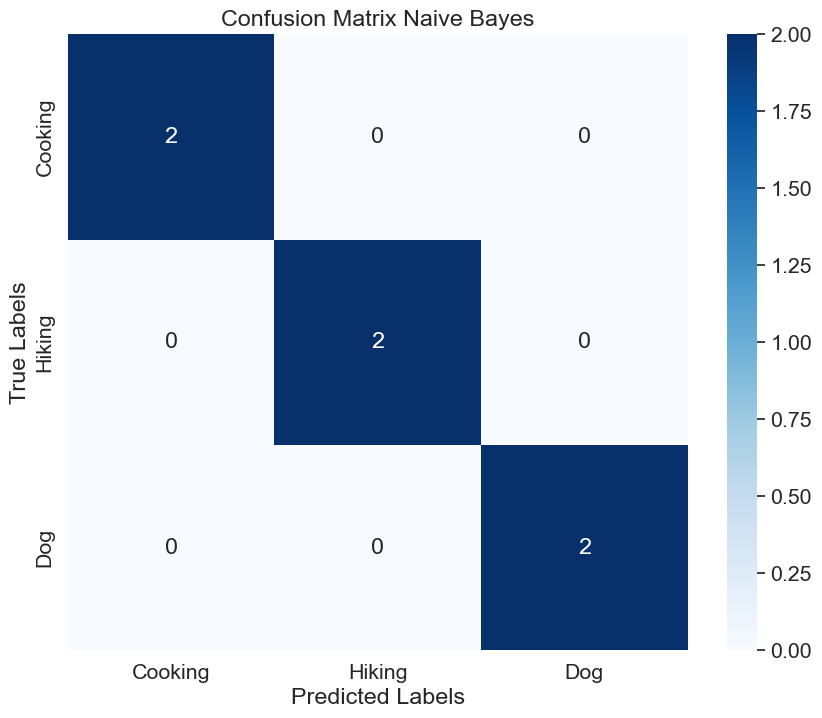

              precision    recall  f1-score   support

     Cooking       1.00      1.00      1.00         2
         Dog       1.00      1.00      1.00         2
      Hiking       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [82]:

classifer_nb = MultinomialNB()
classifer_nb.fit(list(X_train1), y_train1)

predictions = classifer_nb.predict(list(X_test1))

accuracy = accuracy_score(y_test1, predictions)
print(f"Accuracy: {accuracy}")

confusion_mat = confusion_matrix(y_test1, predictions)
print(f"Confusion matrix: {confusion_mat}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Blues', xticklabels=y_train1.unique(), yticklabels=y_train1.unique())

plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(classification_report(y_test1, predictions))

Accuracy: 1.0
Confusion matrix: [[2 0 0]
 [0 2 0]
 [0 0 2]]


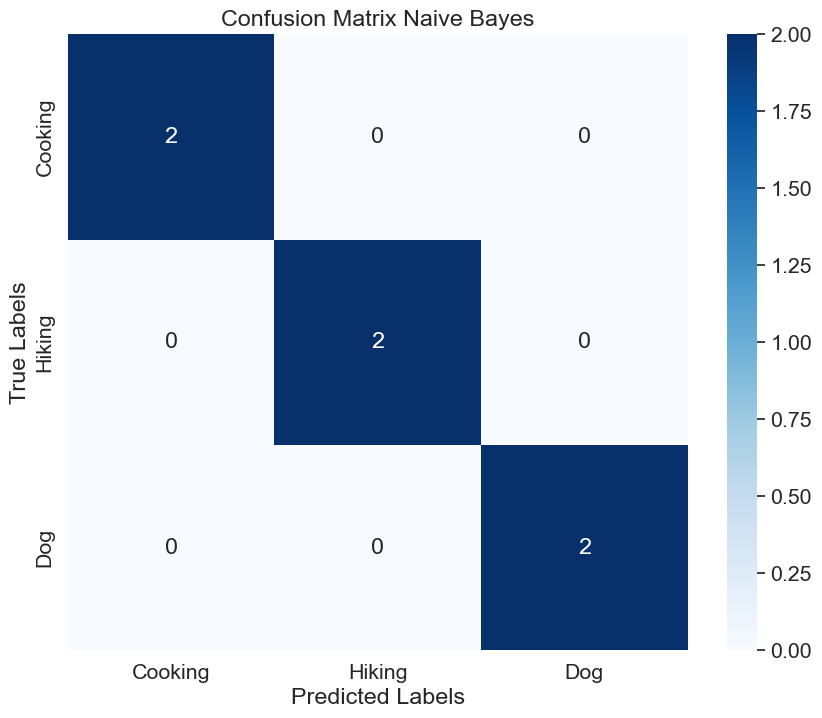

              precision    recall  f1-score   support

     Cooking       1.00      1.00      1.00         2
         Dog       1.00      1.00      1.00         2
      Hiking       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [83]:

classifer_nb = MultinomialNB()
classifer_nb.fit(list(X_train2), y_train2)

predictions = classifer_nb.predict(list(X_test2))

accuracy = accuracy_score(y_test2, predictions)
print(f"Accuracy: {accuracy}")

confusion_mat = confusion_matrix(y_test2, predictions)
print(f"Confusion matrix: {confusion_mat}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Blues', xticklabels=y_train2.unique(), yticklabels=y_train2.unique())

plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(classification_report(y_test2, predictions))

Accuracy: 1.0
Confusion matrix: [[2 0 0]
 [0 2 0]
 [0 0 2]]


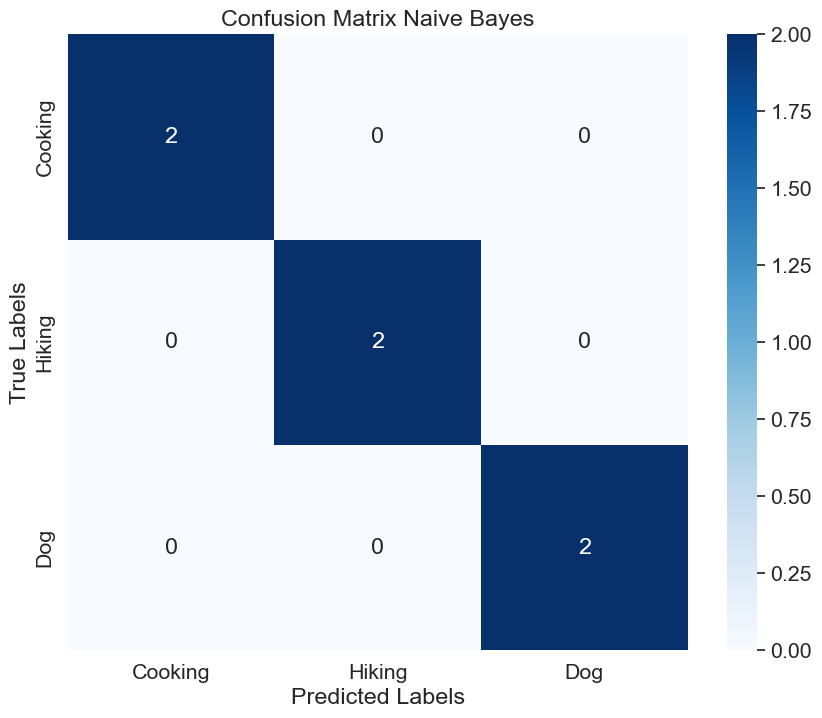

              precision    recall  f1-score   support

     Cooking       1.00      1.00      1.00         2
         Dog       1.00      1.00      1.00         2
      Hiking       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [84]:

classifer_nb = MultinomialNB()
classifer_nb.fit(list(X_train2), y_train2)

predictions = classifer_nb.predict(list(X_test2))

accuracy = accuracy_score(y_test2, predictions)
print(f"Accuracy: {accuracy}")

confusion_mat = confusion_matrix(y_test2, predictions)
print(f"Confusion matrix: {confusion_mat}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Blues', xticklabels=y_train2.unique(), yticklabels=y_train2.unique())

plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(classification_report(y_test2, predictions))

Accuracy: 0.8888888888888888
Confusion matrix: [[3 0 0]
 [0 3 0]
 [1 0 2]]


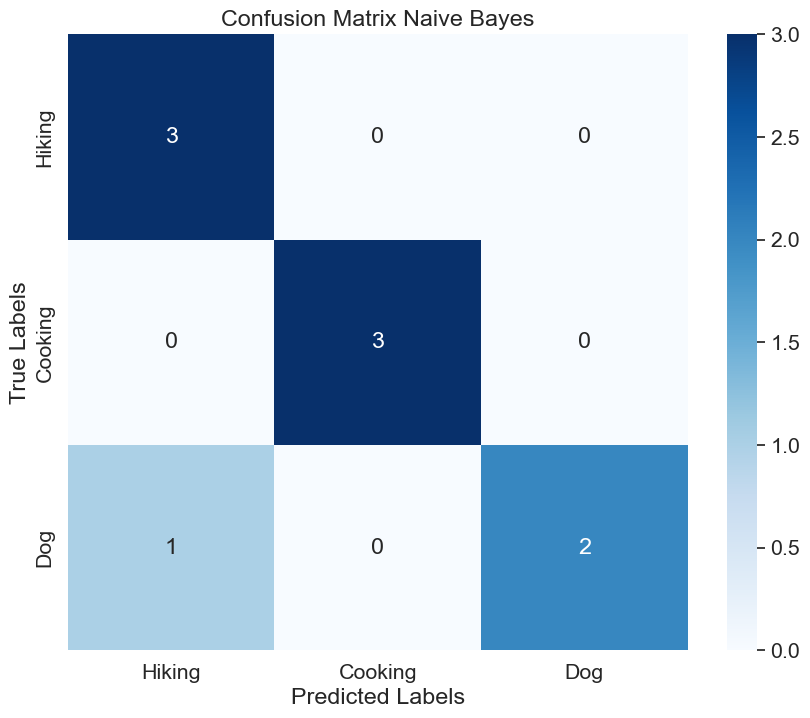

              precision    recall  f1-score   support

     Cooking       0.75      1.00      0.86         3
         Dog       1.00      1.00      1.00         3
      Hiking       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.92      0.89      0.89         9
weighted avg       0.92      0.89      0.89         9



In [85]:

classifer_nb = MultinomialNB()
classifer_nb.fit(list(X_train3), y_train3)

predictions = classifer_nb.predict(list(X_test3))

accuracy = accuracy_score(y_test3, predictions)
print(f"Accuracy: {accuracy}")

confusion_mat = confusion_matrix(y_test3, predictions)
print(f"Confusion matrix: {confusion_mat}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Blues', xticklabels=y_train3.unique(), yticklabels=y_train3.unique())

plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(classification_report(y_test3, predictions))

Accuracy: 0.8333333333333334
Confusion matrix: [[4 0 0]
 [0 4 0]
 [2 0 2]]


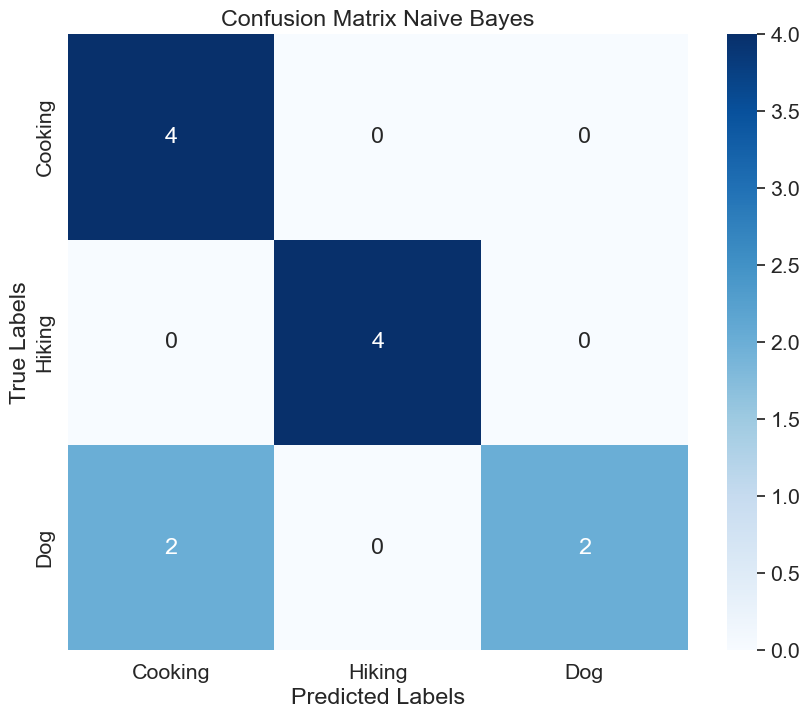

              precision    recall  f1-score   support

     Cooking       0.67      1.00      0.80         4
         Dog       1.00      1.00      1.00         4
      Hiking       1.00      0.50      0.67         4

    accuracy                           0.83        12
   macro avg       0.89      0.83      0.82        12
weighted avg       0.89      0.83      0.82        12



In [86]:

classifer_nb = MultinomialNB()
classifer_nb.fit(list(X_train4), y_train4)

predictions = classifer_nb.predict(list(X_test4))

accuracy = accuracy_score(y_test4, predictions)
print(f"Accuracy: {accuracy}")

confusion_mat = confusion_matrix(y_test4, predictions)
print(f"Confusion matrix: {confusion_mat}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Blues', xticklabels=y_train4.unique(), yticklabels=y_train4.unique())

plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(classification_report(y_test4, predictions))

Accuracy(DT1): 0.8333333333333334
Confusion matrix(DT1): [[2 0 0]
 [0 2 0]
 [1 0 1]]


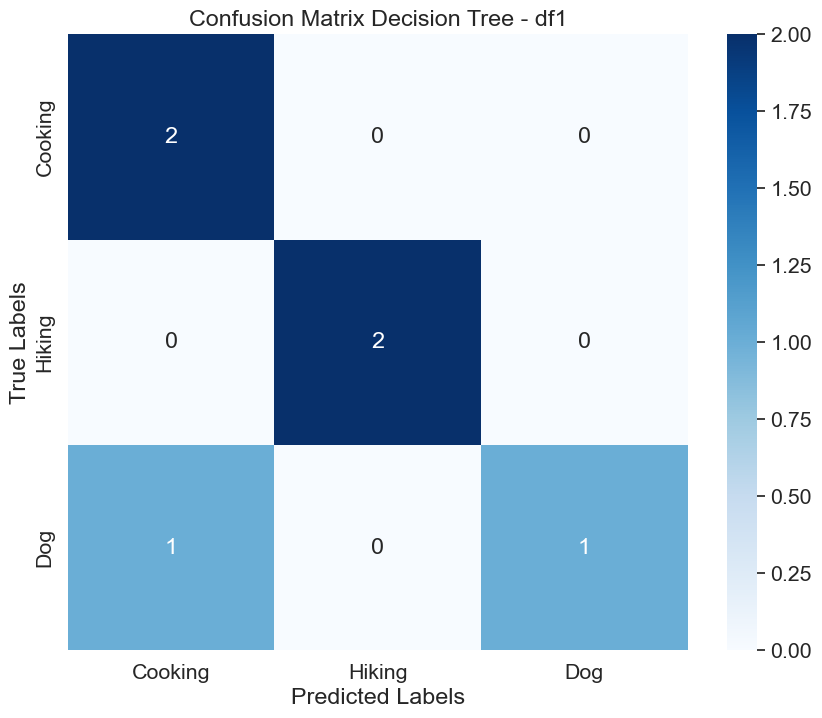

'tree1.png.pdf'

In [87]:

dt_classifier1 = DecisionTreeClassifier(max_depth=8, min_samples_split=10, random_state=44)

dt_classifier1.fit(list(X_train1), y_train1)

predictions1 = dt_classifier1.predict(list(X_test1))

accuracy1 = accuracy_score(y_test1, predictions1)
print(f"Accuracy(DT1): {accuracy1}")

confusion_mat1 = confusion_matrix(y_test1, predictions1)
print(f"Confusion matrix(DT1): {confusion_mat1}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat1, annot=True, fmt='g', cmap='Blues', xticklabels=y_train1.unique(), yticklabels=y_train1.unique())


plt.title('Confusion Matrix Decision Tree - df1')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Tree
import graphviz
dot_data1 = tree.export_graphviz(dt_classifier1, out_file=None,class_names=y1.unique(), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data1)
graph.render('tree1.png')

Accuracy(DT1): 0.8333333333333334
Confusion matrix(DT1): [[2 0 0]
 [0 2 0]
 [1 0 1]]


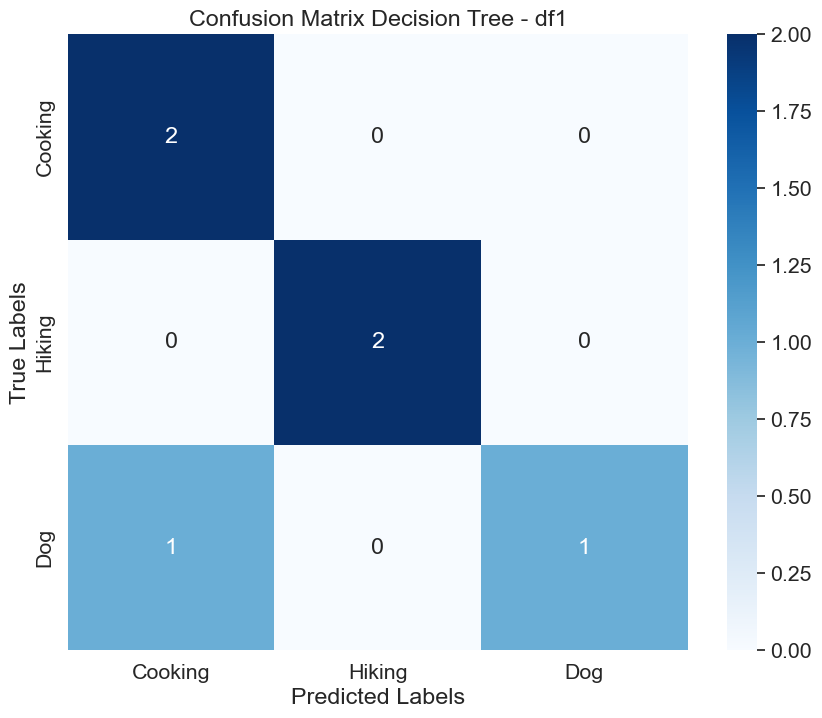

In [88]:

dt_classifier1 = DecisionTreeClassifier(max_depth=8, min_samples_split=10, random_state=44)

dt_classifier1.fit(list(X_train1), y_train1)

predictions1 = dt_classifier1.predict(list(X_test1))

accuracy1 = accuracy_score(y_test1, predictions1)
print(f"Accuracy(DT1): {accuracy1}")

confusion_mat1 = confusion_matrix(y_test1, predictions1)
print(f"Confusion matrix(DT1): {confusion_mat1}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat1, annot=True, fmt='g', cmap='Blues', xticklabels=y_train1.unique(), yticklabels=y_train1.unique())


plt.title('Confusion Matrix Decision Tree - df1')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Accuracy(DT1): 0.6666666666666666
Confusion matrix(DT1): [[2 1 0]
 [0 3 0]
 [0 2 1]]


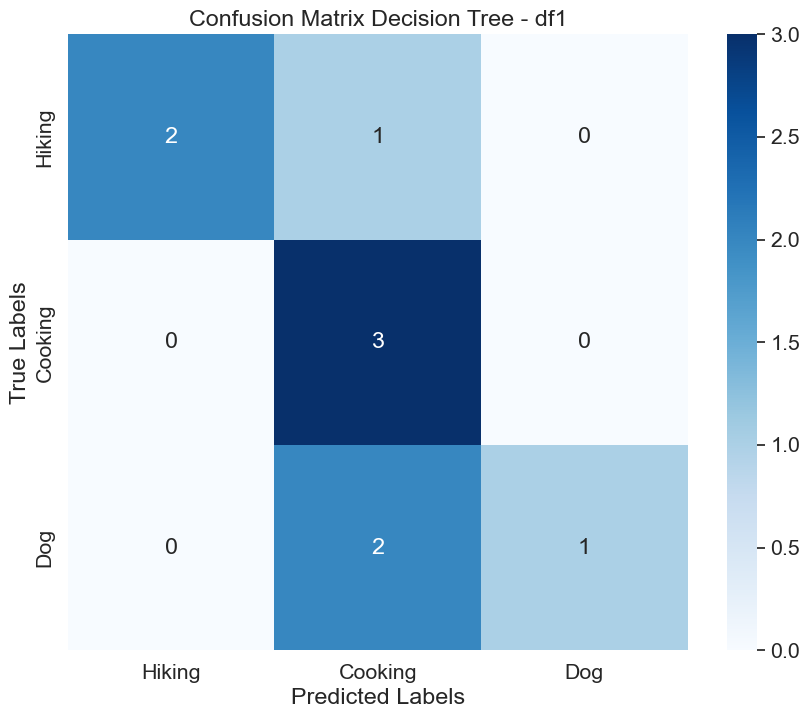

In [89]:

dt_classifier1 = DecisionTreeClassifier(max_depth=8, min_samples_split=10, random_state=44)

dt_classifier1.fit(list(X_train3), y_train3)

predictions1 = dt_classifier1.predict(list(X_test3))

accuracy1 = accuracy_score(y_test3, predictions1)
print(f"Accuracy(DT1): {accuracy1}")

confusion_mat1 = confusion_matrix(y_test3, predictions1)
print(f"Confusion matrix(DT1): {confusion_mat1}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat1, annot=True, fmt='g', cmap='Blues', xticklabels=y_train3.unique(), yticklabels=y_train3.unique())


plt.title('Confusion Matrix Decision Tree - df1')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Accuracy(DT1): 0.8333333333333334
Confusion matrix(DT1): [[4 0 0]
 [0 4 0]
 [2 0 2]]


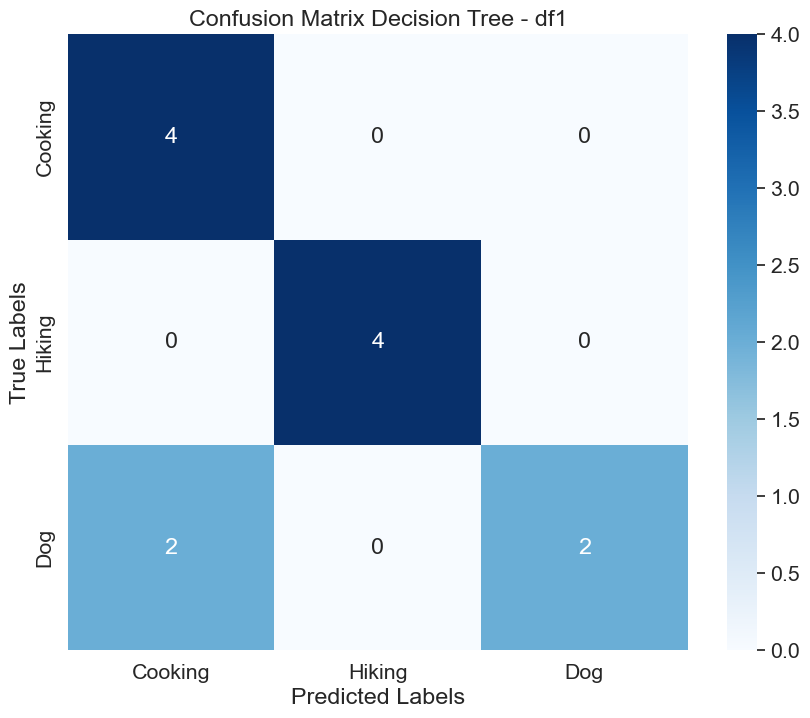

In [90]:

dt_classifier1 = DecisionTreeClassifier(max_depth=8, min_samples_split=10, random_state=44)

dt_classifier1.fit(list(X_train4), y_train4)

predictions1 = dt_classifier1.predict(list(X_test4))

accuracy1 = accuracy_score(y_test4, predictions1)
print(f"Accuracy(DT1): {accuracy1}")

confusion_mat1 = confusion_matrix(y_test4, predictions1)
print(f"Confusion matrix(DT1): {confusion_mat1}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat1, annot=True, fmt='g', cmap='Blues', xticklabels=y_train4.unique(), yticklabels=y_train4.unique())


plt.title('Confusion Matrix Decision Tree - df1')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


SVM Classifier
Linear Kernel

Linear kernel accuracy: 0.8333333333333334
Linear kernel confusion matrix: [[2 0 0]
 [0 2 0]
 [1 0 1]]


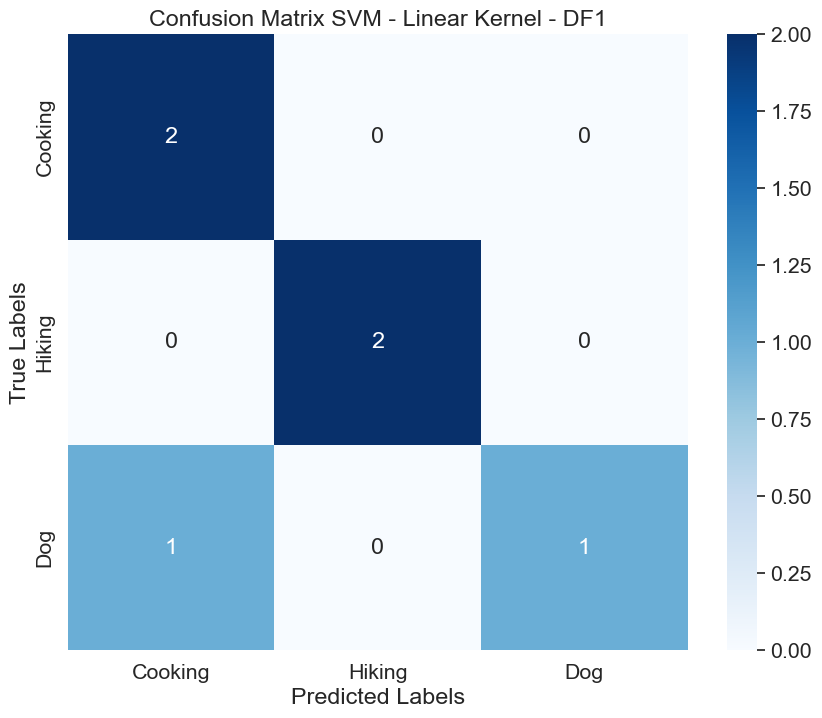

In [91]:

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(list(X_train1), y_train1)


predictions_linear = svm_classifier.predict(list(X_test1))


accuracy_linear = accuracy_score(y_test1, predictions_linear)
print(f"Linear kernel accuracy: {accuracy_linear}")

confusion_mat_linear = confusion_matrix(y_test1, predictions_linear)
print(f"Linear kernel confusion matrix: {confusion_mat_linear}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat_linear, annot=True, fmt='g', cmap='Blues', xticklabels=y_train1.unique(), yticklabels=y_train1.unique())


plt.title('Confusion Matrix SVM - Linear Kernel - DF1')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Linear kernel accuracy: 1.0
Linear kernel confusion matrix: [[2 0 0]
 [0 2 0]
 [0 0 2]]


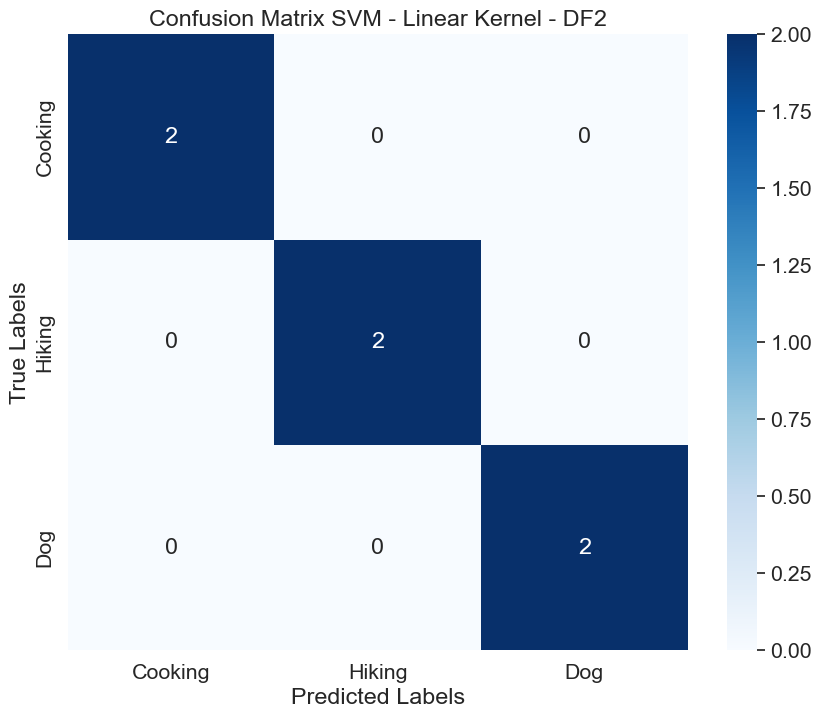

In [92]:

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(list(X_train2), y_train2)


predictions_linear = svm_classifier.predict(list(X_test2))


accuracy_linear = accuracy_score(y_test2, predictions_linear)
print(f"Linear kernel accuracy: {accuracy_linear}")

confusion_mat_linear = confusion_matrix(y_test2, predictions_linear)
print(f"Linear kernel confusion matrix: {confusion_mat_linear}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat_linear, annot=True, fmt='g', cmap='Blues', xticklabels=y_train2.unique(), yticklabels=y_train2.unique())


plt.title('Confusion Matrix SVM - Linear Kernel - DF2')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Linear kernel accuracy: 0.6666666666666666
Linear kernel confusion matrix: [[2 1 0]
 [0 3 0]
 [2 0 1]]


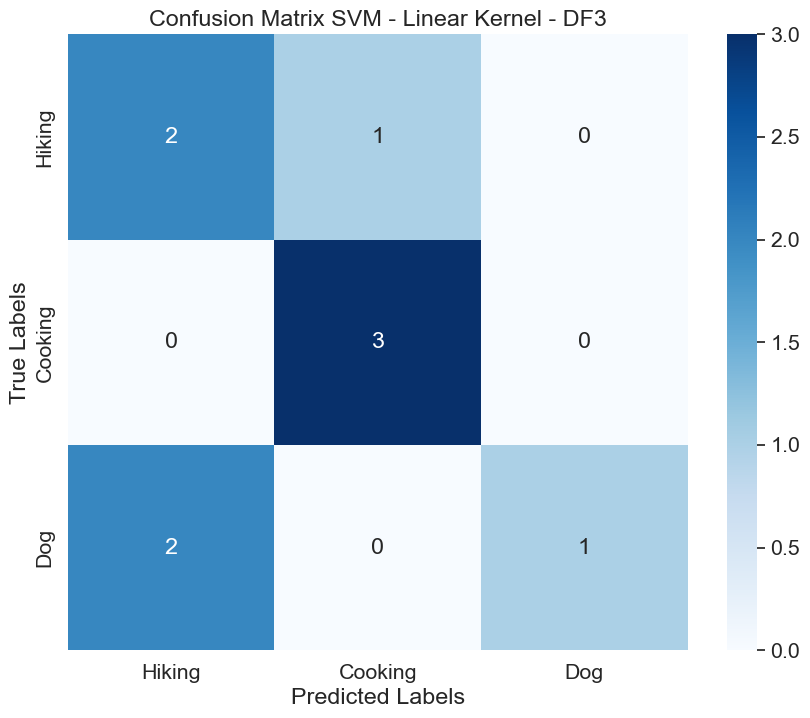

In [93]:

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(list(X_train3), y_train3)


predictions_linear = svm_classifier.predict(list(X_test3))


accuracy_linear = accuracy_score(y_test3, predictions_linear)
print(f"Linear kernel accuracy: {accuracy_linear}")

confusion_mat_linear = confusion_matrix(y_test3, predictions_linear)
print(f"Linear kernel confusion matrix: {confusion_mat_linear}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat_linear, annot=True, fmt='g', cmap='Blues', xticklabels=y_train3.unique(), yticklabels=y_train3.unique())


plt.title('Confusion Matrix SVM - Linear Kernel - DF3')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Linear kernel accuracy: 0.75
Linear kernel confusion matrix: [[4 0 0]
 [0 4 0]
 [3 0 1]]


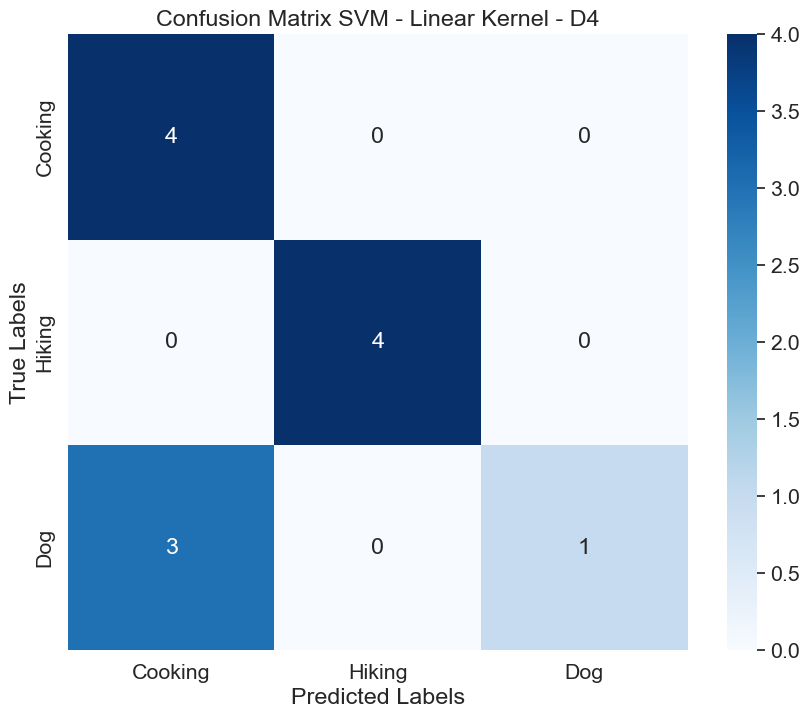

In [94]:

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(list(X_train4), y_train4)


predictions_linear = svm_classifier.predict(list(X_test4))


accuracy_linear = accuracy_score(y_test4, predictions_linear)
print(f"Linear kernel accuracy: {accuracy_linear}")

confusion_mat_linear = confusion_matrix(y_test4, predictions_linear)
print(f"Linear kernel confusion matrix: {confusion_mat_linear}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat_linear, annot=True, fmt='g', cmap='Blues', xticklabels=y_train4.unique(), yticklabels=y_train4.unique())


plt.title('Confusion Matrix SVM - Linear Kernel - D4')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Linear kernel accuracy: 0.3333333333333333
Linear kernel confusion matrix: [[2 0 0]
 [2 0 0]
 [2 0 0]]


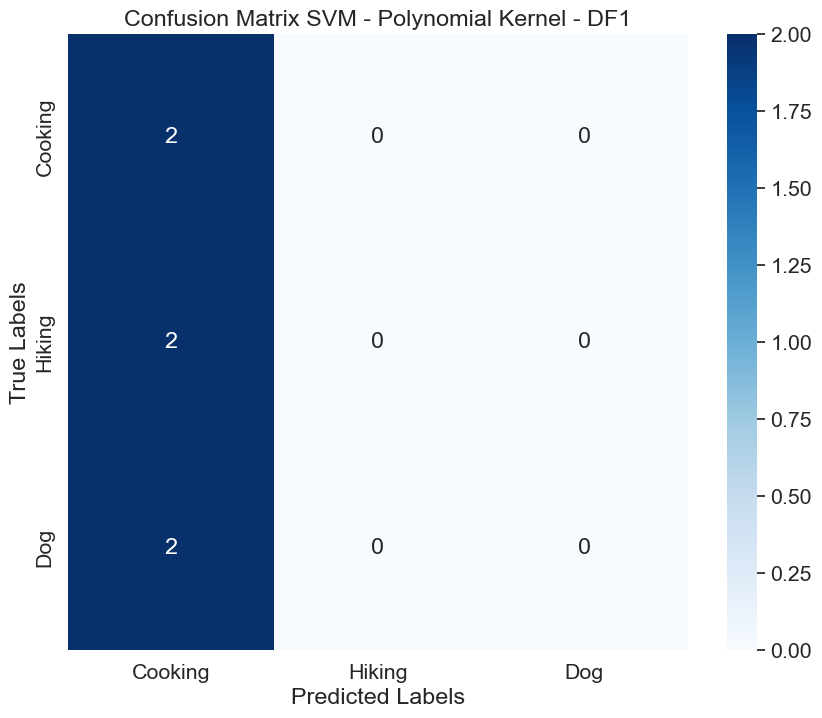

In [95]:

svm_classifier = SVC(kernel='poly')
svm_classifier.fit(list(X_train1), y_train1)


predictions_linear = svm_classifier.predict(list(X_test1))


accuracy_linear = accuracy_score(y_test1, predictions_linear)
print(f"Linear kernel accuracy: {accuracy_linear}")

confusion_mat_linear = confusion_matrix(y_test1, predictions_linear)
print(f"Linear kernel confusion matrix: {confusion_mat_linear}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat_linear, annot=True, fmt='g', cmap='Blues', xticklabels=y_train1.unique(), yticklabels=y_train1.unique())


plt.title('Confusion Matrix SVM - Polynomial Kernel - DF1')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Linear kernel accuracy: 0.5
Linear kernel confusion matrix: [[2 0 0]
 [2 0 0]
 [1 0 1]]


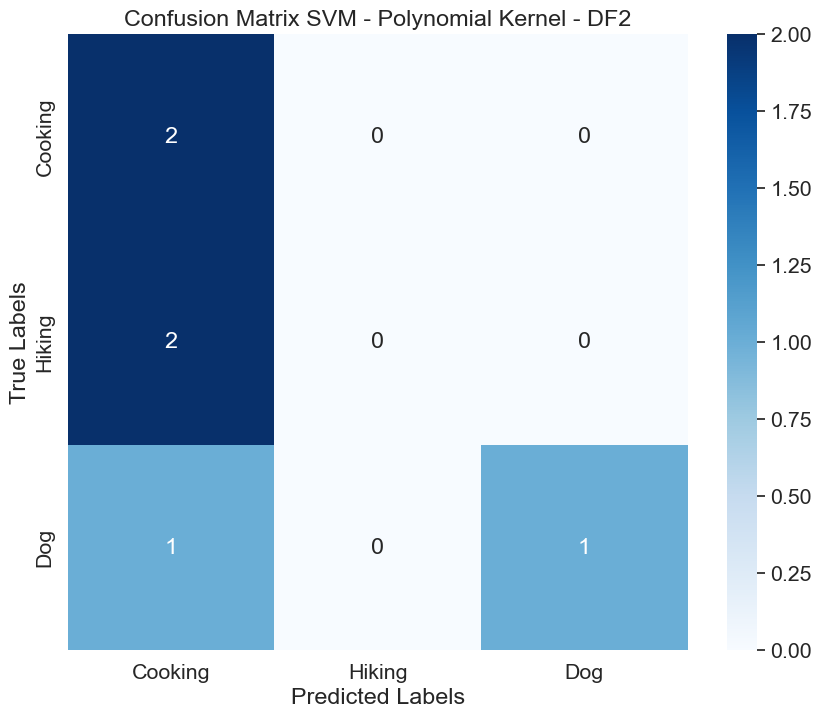

In [96]:

svm_classifier = SVC(kernel='poly')
svm_classifier.fit(list(X_train2), y_train2)


predictions_linear = svm_classifier.predict(list(X_test2))


accuracy_linear = accuracy_score(y_test2, predictions_linear)
print(f"Linear kernel accuracy: {accuracy_linear}")

confusion_mat_linear = confusion_matrix(y_test2, predictions_linear)
print(f"Linear kernel confusion matrix: {confusion_mat_linear}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat_linear, annot=True, fmt='g', cmap='Blues', xticklabels=y_train2.unique(), yticklabels=y_train2.unique())


plt.title('Confusion Matrix SVM - Polynomial Kernel - DF2')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Linear kernel accuracy: 0.4444444444444444
Linear kernel confusion matrix: [[3 0 0]
 [2 1 0]
 [3 0 0]]


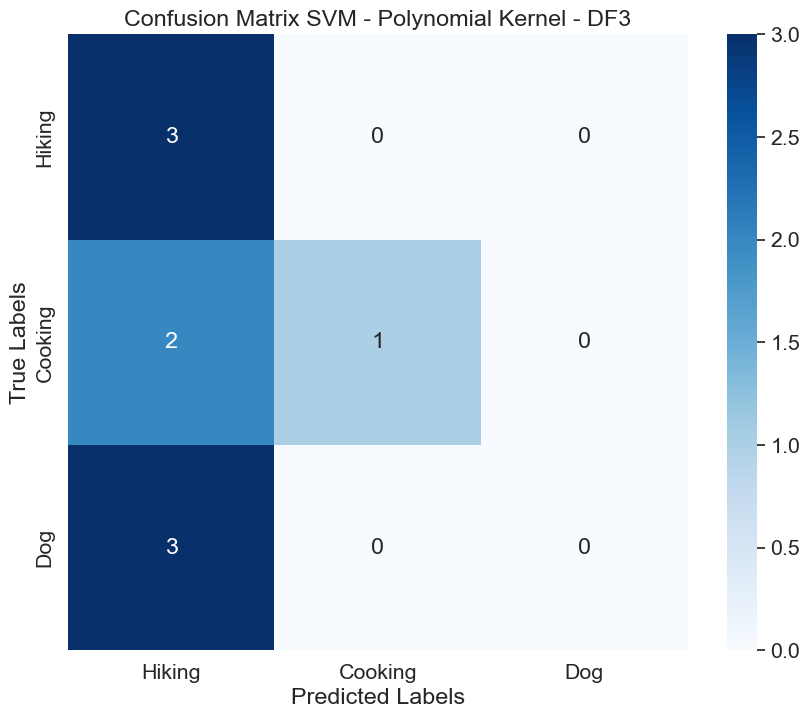

In [97]:

svm_classifier = SVC(kernel='poly')
svm_classifier.fit(list(X_train3), y_train3)


predictions_linear = svm_classifier.predict(list(X_test3))


accuracy_linear = accuracy_score(y_test3, predictions_linear)
print(f"Linear kernel accuracy: {accuracy_linear}")

confusion_mat_linear = confusion_matrix(y_test3, predictions_linear)
print(f"Linear kernel confusion matrix: {confusion_mat_linear}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat_linear, annot=True, fmt='g', cmap='Blues', xticklabels=y_train3.unique(), yticklabels=y_train3.unique())


plt.title('Confusion Matrix SVM - Polynomial Kernel - DF3')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Linear kernel accuracy: 0.75
Linear kernel confusion matrix: [[3 0 1]
 [0 4 0]
 [2 0 2]]


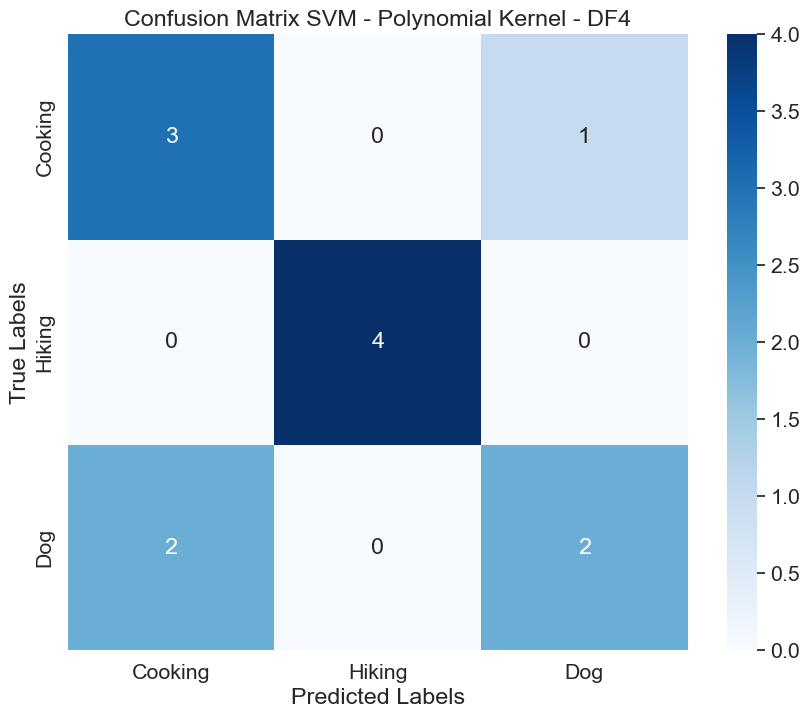

In [98]:

svm_classifier = SVC(kernel='poly')
svm_classifier.fit(list(X_train4), y_train4)


predictions_linear = svm_classifier.predict(list(X_test4))


accuracy_linear = accuracy_score(y_test4, predictions_linear)
print(f"Linear kernel accuracy: {accuracy_linear}")

confusion_mat_linear = confusion_matrix(y_test4, predictions_linear)
print(f"Linear kernel confusion matrix: {confusion_mat_linear}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat_linear, annot=True, fmt='g', cmap='Blues', xticklabels=y_train4.unique(), yticklabels=y_train4.unique())


plt.title('Confusion Matrix SVM - Polynomial Kernel - DF4')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Linear kernel accuracy: 1.0
Linear kernel confusion matrix: [[2 0 0]
 [0 2 0]
 [0 0 2]]


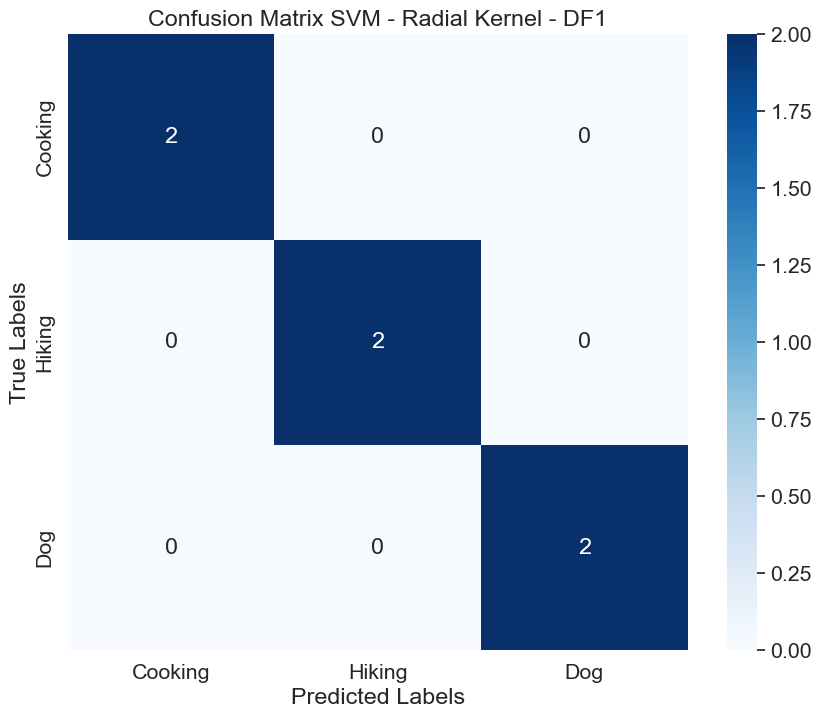

In [99]:

svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(list(X_train1), y_train1)


predictions_linear = svm_classifier.predict(list(X_test1))


accuracy_linear = accuracy_score(y_test1, predictions_linear)
print(f"Linear kernel accuracy: {accuracy_linear}")

confusion_mat_linear = confusion_matrix(y_test1, predictions_linear)
print(f"Linear kernel confusion matrix: {confusion_mat_linear}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat_linear, annot=True, fmt='g', cmap='Blues', xticklabels=y_train1.unique(), yticklabels=y_train1.unique())


plt.title('Confusion Matrix SVM - Radial Kernel - DF1')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Linear kernel accuracy: 1.0
Linear kernel confusion matrix: [[2 0 0]
 [0 2 0]
 [0 0 2]]


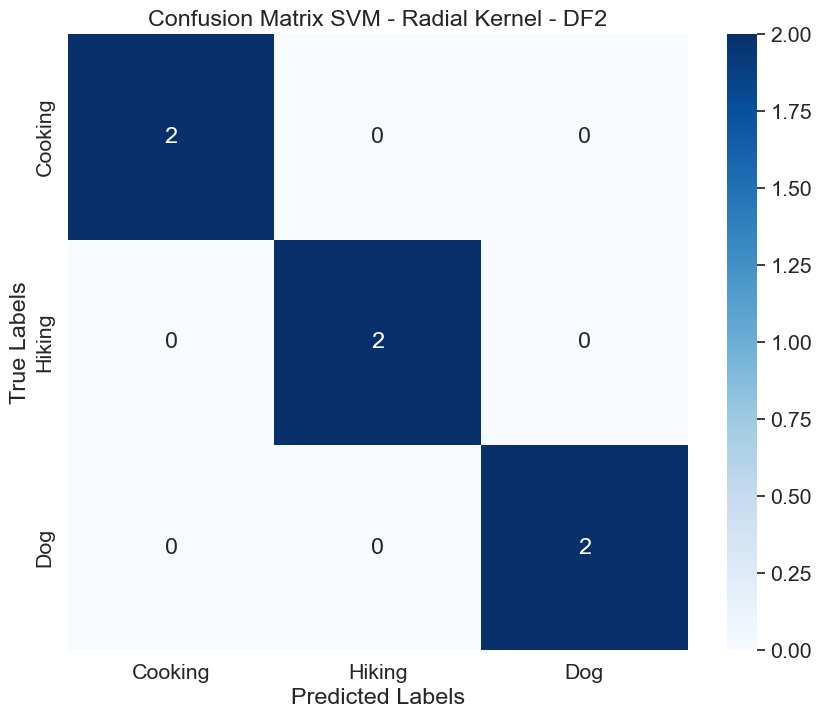

In [100]:

svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(list(X_train2), y_train2)


predictions_linear = svm_classifier.predict(list(X_test2))


accuracy_linear = accuracy_score(y_test2, predictions_linear)
print(f"Linear kernel accuracy: {accuracy_linear}")

confusion_mat_linear = confusion_matrix(y_test2, predictions_linear)
print(f"Linear kernel confusion matrix: {confusion_mat_linear}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat_linear, annot=True, fmt='g', cmap='Blues', xticklabels=y_train2.unique(), yticklabels=y_train2.unique())


plt.title('Confusion Matrix SVM - Radial Kernel - DF2')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Linear kernel accuracy: 0.6666666666666666
Linear kernel confusion matrix: [[2 1 0]
 [0 3 0]
 [2 0 1]]


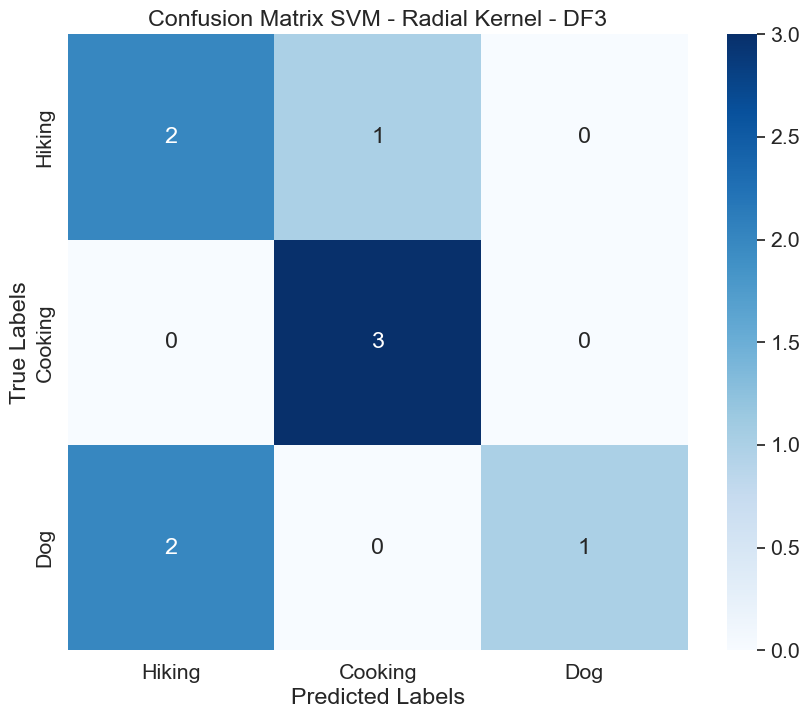

In [101]:

svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(list(X_train3), y_train3)


predictions_linear = svm_classifier.predict(list(X_test3))


accuracy_linear = accuracy_score(y_test3, predictions_linear)
print(f"Linear kernel accuracy: {accuracy_linear}")

confusion_mat_linear = confusion_matrix(y_test3, predictions_linear)
print(f"Linear kernel confusion matrix: {confusion_mat_linear}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat_linear, annot=True, fmt='g', cmap='Blues', xticklabels=y_train3.unique(), yticklabels=y_train3.unique())


plt.title('Confusion Matrix SVM - Radial Kernel - DF3')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Linear kernel accuracy: 0.75
Linear kernel confusion matrix: [[3 0 1]
 [0 4 0]
 [2 0 2]]


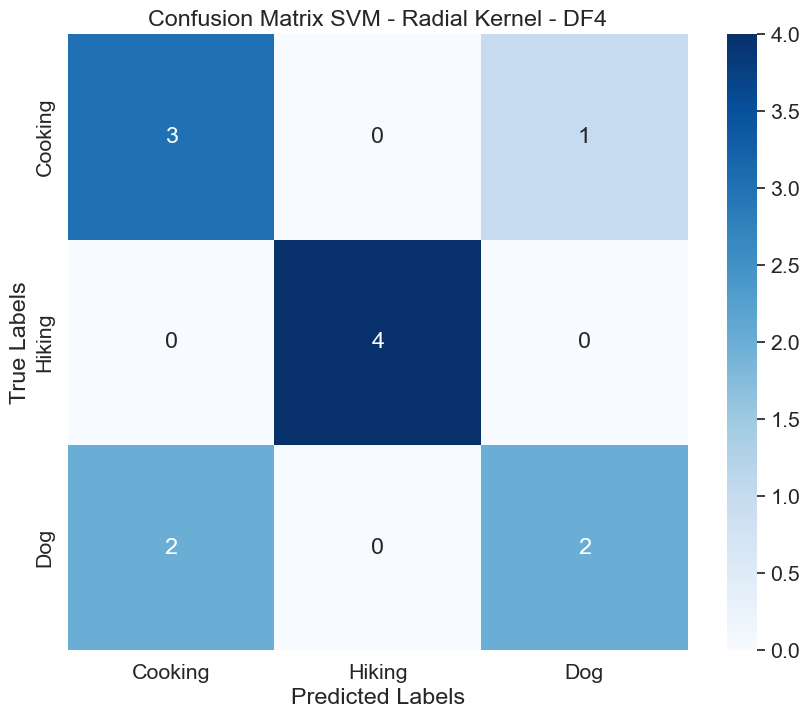

In [102]:

svm_classifier = SVC(kernel='poly')
svm_classifier.fit(list(X_train4), y_train4)


predictions_linear = svm_classifier.predict(list(X_test4))


accuracy_linear = accuracy_score(y_test4, predictions_linear)
print(f"Linear kernel accuracy: {accuracy_linear}")

confusion_mat_linear = confusion_matrix(y_test4, predictions_linear)
print(f"Linear kernel confusion matrix: {confusion_mat_linear}")

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat_linear, annot=True, fmt='g', cmap='Blues', xticklabels=y_train4.unique(), yticklabels=y_train4.unique())


plt.title('Confusion Matrix SVM - Radial Kernel - DF4')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()